# Load Data

In [2]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import helper_functions as hf



# magic word for producing visualizations in notebook
%matplotlib inline

datafolder = "../data/"

traindatafile = "../data/Udacity_MAILOUT_052018_TRAIN.csv"
testdatafile = "../data/Udacity_MAILOUT_052018_TEST.csv"

In [3]:
azdias = pd.read_csv(datafolder + "Udacity_AZDIAS_052018.csv", sep=";")
customers = pd.read_csv(datafolder + "Udacity_CUSTOMERS_052018.csv", sep=";")
traindata = pd.read_csv(traindatafile, sep=";")
testdata = pd.read_csv(testdatafile, sep=";")
azdias.head(2)

c:\users\jaweria\miniconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1


In [4]:
print("Loaded AZDIAS data with size :", azdias.shape)
print("Loaded Customers data with size :", customers.shape)
print("Loaded Training data with size : ", traindata.shape)
print("Loaded Testing data with size :", testdata.shape)


customers.describe()

Loaded AZDIAS data with size : (891221, 366)
Loaded Customers data with size : (191652, 369)
Loaded Training data with size :  (42962, 367)
Loaded Testing data with size : (42833, 366)


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,191652.000000,191652.000000,145056.000000,145056.000000,11766.000000,5100.000000,1275.000000,236.000000,139810.000000,141725.000000,...,143781.000000,143781.000000,143781.000000,137910.000000,145056.000000,141725.000000,191652.000000,191652.000000,191652.000000,191652.000000
mean,95826.500000,0.344359,1.747525,11.352009,12.337243,13.672353,14.647059,15.377119,10.331579,4.965863,...,4.374417,4.564769,3.168868,4.152716,8.646371,3.723133,2.576806,0.090247,1.376432,3.060907
std,55325.311233,1.391672,1.966334,6.275026,4.006050,3.243335,2.753787,2.307653,4.134828,14.309694,...,2.924355,2.887035,2.233516,1.974375,1.154001,2.095540,1.168486,0.286536,0.484492,1.086254
min,1.000000,-1.000000,1.000000,0.000000,2.000000,2.000000,5.000000,8.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,47913.750000,-1.000000,1.000000,8.000000,9.000000,11.000000,13.000000,14.000000,9.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,9.000000,2.000000,1.000000,0.000000,1.000000,3.000000
50%,95826.500000,0.000000,1.000000,11.000000,13.000000,14.000000,15.000000,16.000000,10.000000,1.000000,...,4.000000,4.000000,3.000000,5.000000,9.000000,3.000000,3.000000,0.000000,1.000000,3.000000
75%,143739.250000,2.000000,1.000000,16.000000,16.000000,16.000000,17.000000,17.000000,13.000000,4.000000,...,7.000000,7.000000,4.000000,6.000000,9.000000,5.000000,3.000000,0.000000,2.000000,4.000000
max,191652.000000,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,523.000000,...,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,1.000000,2.000000,9.000000


In [5]:
"""
Load in the feature descriptions 
"""
level_info_df = pd.read_excel(datafolder + "DIAS Information Levels - Attributes 2017.xlsx", header=1)
display(level_info_df.head(3))
display(level_info_df.info())

,Unnamed: 0,Information level,Attribute,Description,Additional notes
0,NaN,NaN,AGER_TYP,best-ager typology,in cooperation with Kantar TNS; the informatio...
1,NaN,Person,ALTERSKATEGORIE_GROB,age through prename analysis,modelled on millions of first name-age-referen...
2,NaN,NaN,ANREDE_KZ,gender,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         0 non-null      float64
 1   Information level  10 non-null     object 
 2   Attribute          313 non-null    object 
 3   Description        313 non-null    object 
 4   Additional notes   20 non-null     object 
dtypes: float64(1), object(4)
memory usage: 12.4+ KB


None

In [6]:
attribute_info_df = pd.read_excel(datafolder + "DIAS Attributes - Values 2017.xlsx", header=1)
display(attribute_info_df.head(3))
display(attribute_info_df.info())

,Unnamed: 0,Attribute,Description,Value,Meaning
0,NaN,AGER_TYP,best-ager typology,-1,unknown
1,NaN,NaN,NaN,0,no classification possible
2,NaN,NaN,NaN,1,passive elderly


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Attribute    314 non-null    object 
 2   Description  351 non-null    object 
 3   Value        2258 non-null   object 
 4   Meaning      2247 non-null   object 
dtypes: float64(1), object(4)
memory usage: 88.3+ KB


None

# Data Cleaning

### Cleaning the categorical and/or non-numeric columns
Some columns have nan and "XX" values that are filled with the mean for numeric (float) columns, and for non-numeric (string) columns, the nan are filled with "XX" and the "XX" is taken to be a feature. Non-numeric columns are one-hot-encoded. 

Deprecated helper function - was needed to build column transformations lookup dictionary


`def find_nonnumeric_columns(data):
    """
    Finds the columns in a dataframe that contain ANY non-numeric values, and returns those column names as a list
    """
    columns_with_string_type = data.applymap(lambda x: isinstance(x, str))
    column_check = columns_with_string_type.any(axis=0) #.reset_index()
    return column_check[column_check == True].index.tolist()
`

In [7]:
import missingno as msno
#visualize the missing data and include it in the report

In [8]:
azdias.isna().sum()
# missing values in each column of azdias dataset

LNR                          0
AGER_TYP                     0
AKT_DAT_KL               73499
ALTER_HH                 73499
ALTER_KIND1             810163
                         ...  
WOHNDAUER_2008           73499
WOHNLAGE                 93148
ZABEOTYP                     0
ANREDE_KZ                    0
ALTERSKATEGORIE_GROB         0
Length: 366, dtype: int64

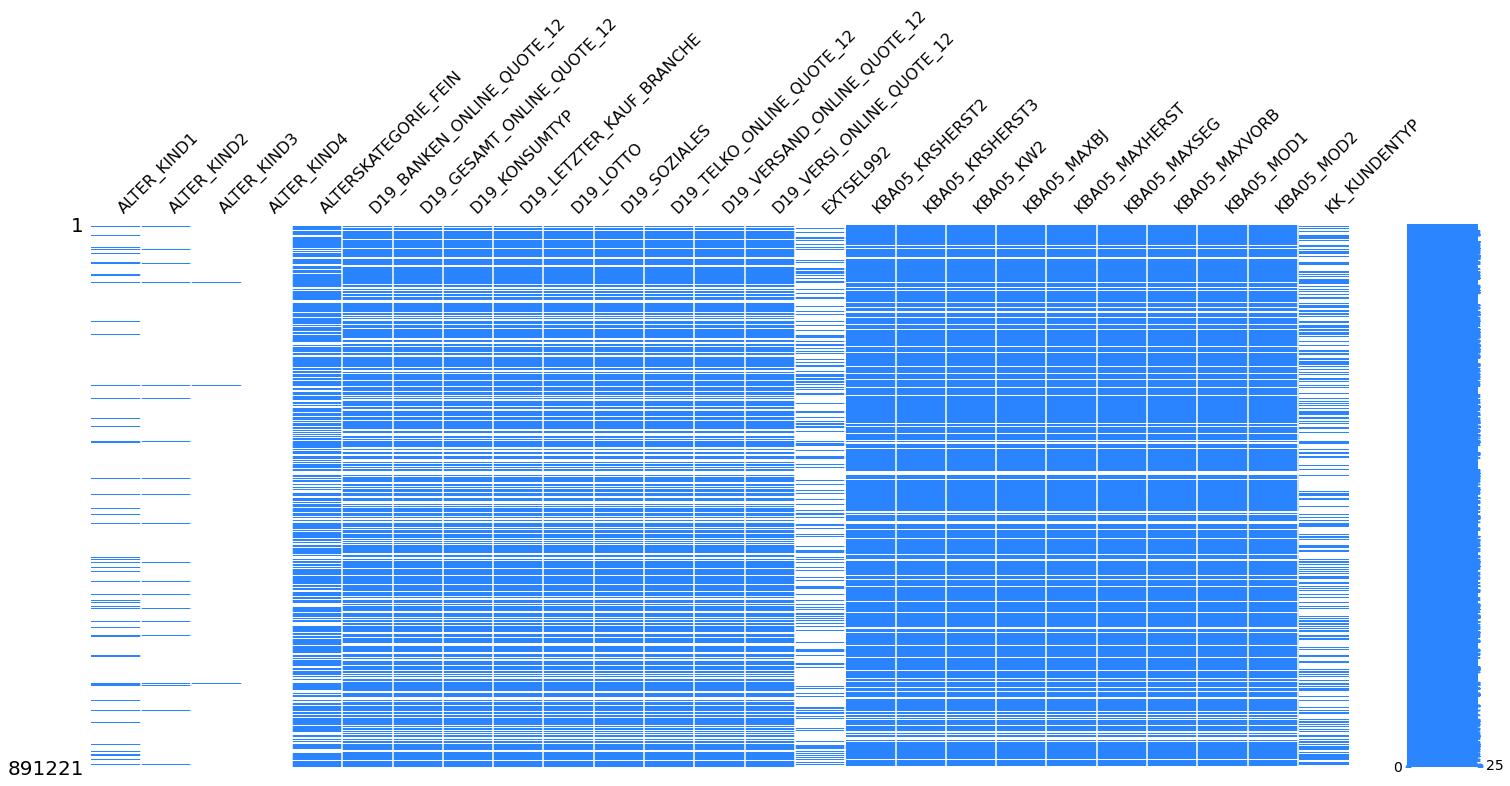

In [9]:
filtered_azdias = msno.nullity_filter(azdias, filter='bottom', n=25, p=0.90) # or filter='top'
msno.matrix(filtered_azdias, color=(0.17, 0.52, 1.0));

'another way of looking at missing data using seaborn'

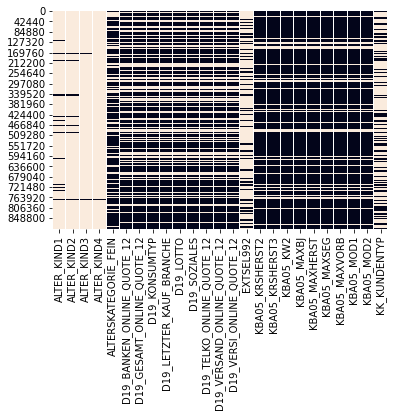

In [10]:
import seaborn as sns
sns.heatmap(filtered_azdias.isnull(), cbar=False)
"""another way of looking at missing data using seaborn"""

<AxesSubplot:>

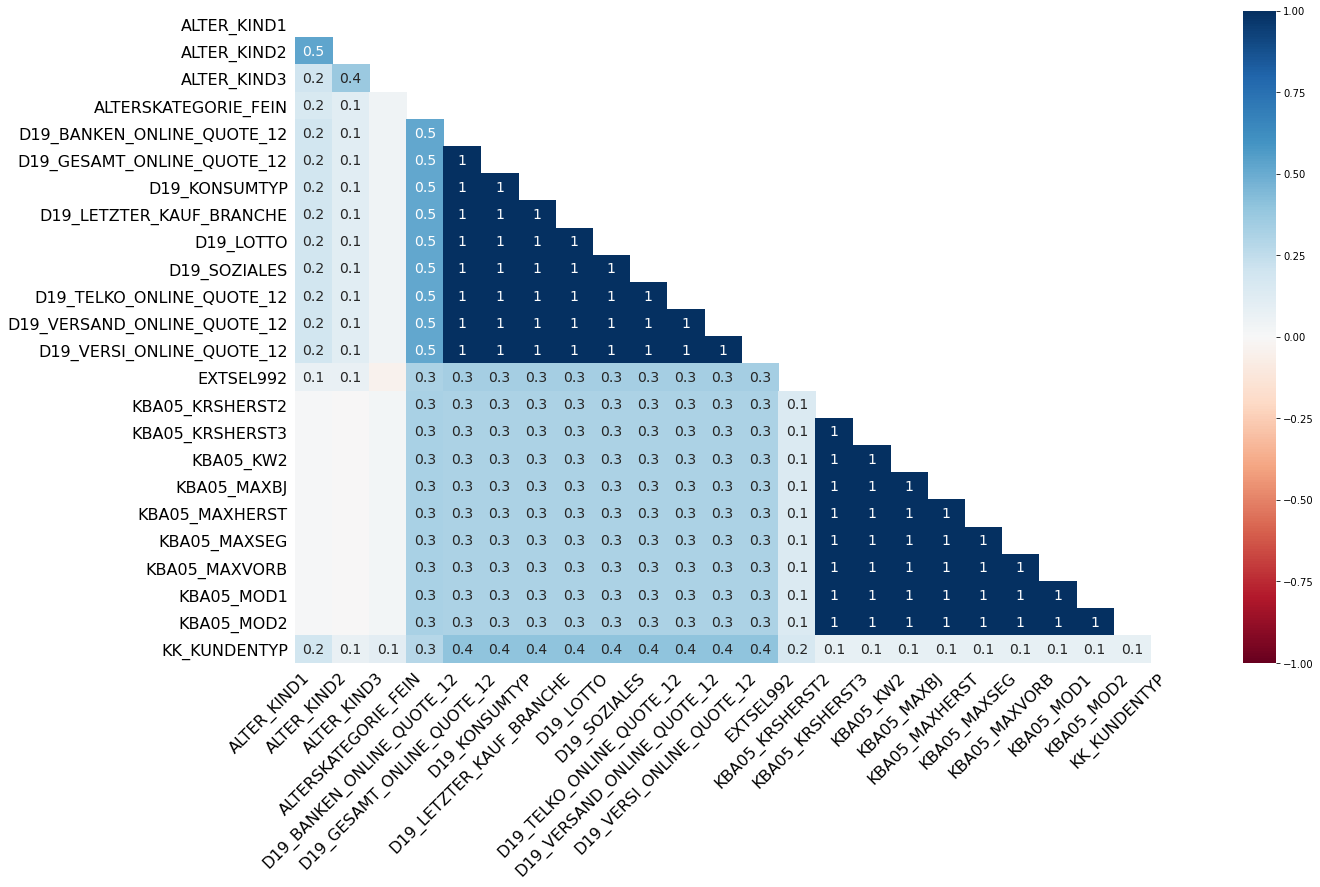

In [11]:
msno.heatmap(filtered_azdias.sample(400))

In [12]:
missing_customers_data = customers.isna().sum()
print (missing_customers_data)

LNR                          0
AGER_TYP                     0
AKT_DAT_KL               46596
ALTER_HH                 46596
ALTER_KIND1             179886
                         ...  
PRODUCT_GROUP                0
CUSTOMER_GROUP               0
ONLINE_PURCHASE              0
ANREDE_KZ                    0
ALTERSKATEGORIE_GROB         0
Length: 369, dtype: int64


In [13]:
print("Columns with more than %.2f nan values:\n" % 0.2, 
      missing_customers_data[(missing_customers_data / customers.shape[0] > 0.20)])  # 10% and 20% drop same num columns

Columns with more than 0.20 nan values:
 AKT_DAT_KL         46596
ALTER_HH           46596
ALTER_KIND1       179886
ALTER_KIND2       186552
ALTER_KIND3       190377
                   ...  
VK_DISTANZ         47871
VK_ZG11            47871
W_KEIT_KIND_HH     53742
WOHNDAUER_2008     46596
WOHNLAGE           49927
Length: 253, dtype: int64


<AxesSubplot:>

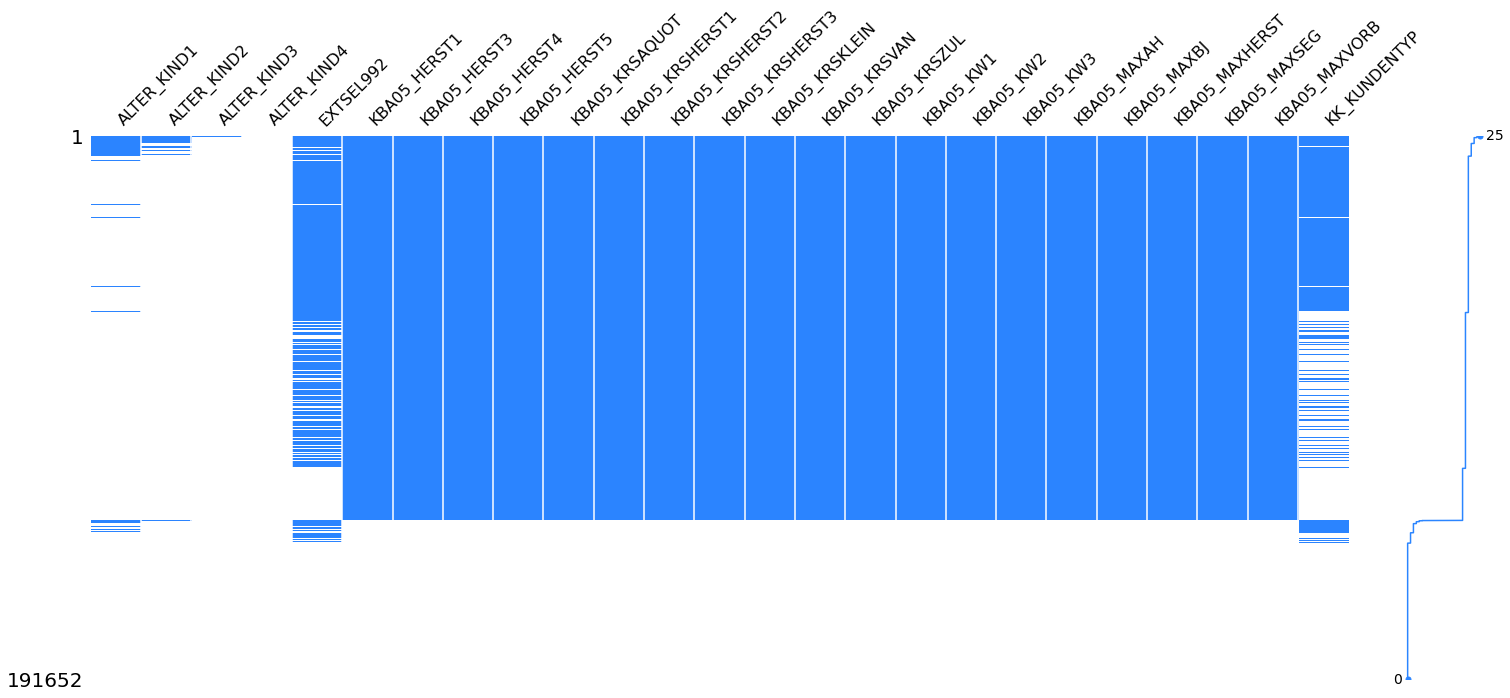

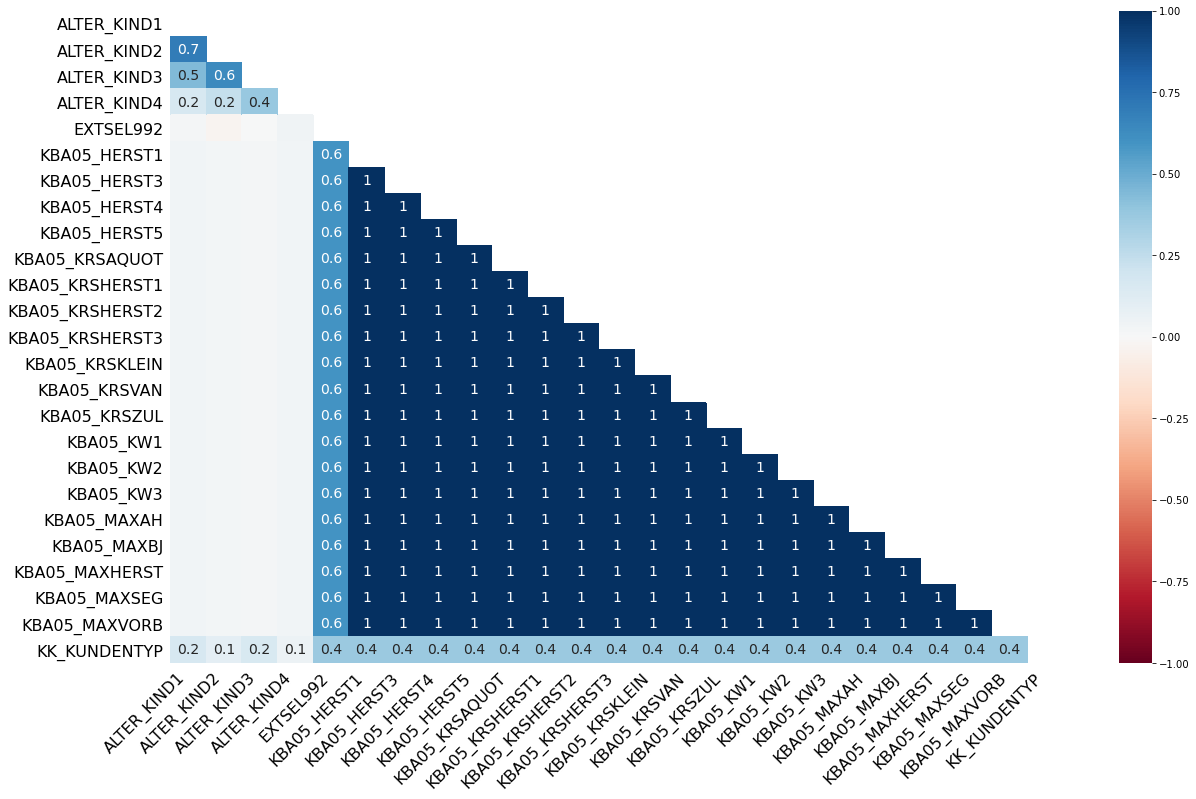

In [14]:
filtered_customers = msno.nullity_filter(customers, filter='bottom', n=25, p=0.90) # or filter='top'
msno.matrix(filtered_customers, color=(0.17, 0.52, 1.0), sort= 'descending');
msno.heatmap(filtered_customers.sample(400))
#msno.bar(customers)

In [15]:
datasets = ["Udacity_AZDIAS_052018", "Udacity_CUSTOMERS_052018"]
column_transformations_lookup = {"Udacity_AZDIAS_052018": 
                                   {'CAMEO_DEU_2015': "onehotencode",
                                    'CAMEO_DEUG_2015': "meanfill",
                                    'CAMEO_INTL_2015': "meanfill",
                                    'D19_LETZTER_KAUF_BRANCHE': "onehotencode",
                                    'EINGEFUEGT_AM': "drop",
                                    'OST_WEST_KZ': "onehotencode"},
                                 
                                 
                                "Udacity_CUSTOMERS_052018": 
                                 {'CAMEO_DEU_2015': "onehotencode",
                                    'CAMEO_DEUG_2015': "meanfill",
                                    'CAMEO_INTL_2015': "meanfill",
                                    'D19_LETZTER_KAUF_BRANCHE': "onehotencode",
                                    'EINGEFUEGT_AM': "drop",
                                    'OST_WEST_KZ': "onehotencode",
                                 'PRODUCT_GROUP': "drop", 
                                 'CUSTOMER_GROUP': "drop",
                                 'ONLINE_PURCHASE': "drop"}, 
                                 
                                 
                                "Udacity_MAILOUT_052018_TRAIN": 
                                {'CAMEO_DEU_2015': "onehotencode",
                                    'CAMEO_DEUG_2015': "meanfill",
                                    'CAMEO_INTL_2015': "meanfill",
                                    'D19_LETZTER_KAUF_BRANCHE': "onehotencode",
                                    'EINGEFUEGT_AM': "drop",
                                    'OST_WEST_KZ': "onehotencode",
                                }, 
                                
                                 
                                 "Udacity_MAILOUT_052018_TEST": 
                                {'CAMEO_DEU_2015': "onehotencode",
                                    'CAMEO_DEUG_2015': "meanfill",
                                    'CAMEO_INTL_2015': "meanfill",
                                    'D19_LETZTER_KAUF_BRANCHE': "onehotencode",
                                    'EINGEFUEGT_AM': "drop",
                                    'OST_WEST_KZ': "onehotencode",
                                }}

In [16]:
def clean_data(datasetname, dataset):
    """
    Use domain knowledge to clean the data columns
    Manual work done upfront to determine the required transformations
    """
    for columnname, columntransformation in column_transformations_lookup[datasetname].items():
        print(columnname, "   transformation:", columntransformation)
        dataset[columnname].fillna("XX", inplace=True)
        dataset[columnname].replace("XX", "X", inplace=True)
        if columntransformation == "onehotencode":
            dataset = pd.get_dummies(dataset, columns=[columnname])
        elif columntransformation == "meanfill":
            mean_value = dataset[dataset[columnname] != "X"][columnname].astype(np.float64).mean()
            dataset[columnname].replace("X", mean_value, inplace=True)
            dataset[columnname] = dataset[columnname].astype(np.float64)
        elif columntransformation == "drop":
            dataset.drop(columnname, axis=1, inplace=True)
        else:
            raise Exception("Column Transformation Not Understood: " + columntransformation)
    return dataset

In [17]:
normalized_azdias = azdias.copy()
normalized_azdias = clean_data("Udacity_AZDIAS_052018", normalized_azdias)
        
print("Azdias data transformation went from {} to {}".format(azdias.shape, normalized_azdias.shape))
print("Added {} new columns to the Azdias data...".format(normalized_azdias.shape[1] - azdias.shape[1]))

CAMEO_DEU_2015    transformation: onehotencode
CAMEO_DEUG_2015    transformation: meanfill
CAMEO_INTL_2015    transformation: meanfill
D19_LETZTER_KAUF_BRANCHE    transformation: onehotencode
EINGEFUEGT_AM    transformation: drop
OST_WEST_KZ    transformation: onehotencode
Azdias data transformation went from (891221, 366) to (891221, 446)
Added 80 new columns to the Azdias data...


In [18]:
normalized_customers = customers.copy()
normalized_customers = clean_data("Udacity_CUSTOMERS_052018", normalized_customers)
        
print("Azdias data transformation went from {} to {}".format(customers.shape, normalized_customers.shape))
print("Added {} new columns to the Azdias data...".format(normalized_customers.shape[1] - customers.shape[1]))

CAMEO_DEU_2015    transformation: onehotencode
CAMEO_DEUG_2015    transformation: meanfill
CAMEO_INTL_2015    transformation: meanfill
D19_LETZTER_KAUF_BRANCHE    transformation: onehotencode
EINGEFUEGT_AM    transformation: drop
OST_WEST_KZ    transformation: onehotencode
PRODUCT_GROUP    transformation: drop
CUSTOMER_GROUP    transformation: drop
ONLINE_PURCHASE    transformation: drop
Azdias data transformation went from (191652, 369) to (191652, 446)
Added 77 new columns to the Azdias data...


In [19]:
normalized_traindata = traindata.copy()
normalized_traindata = clean_data("Udacity_MAILOUT_052018_TRAIN", normalized_traindata)

print("Train data transformation went from {} to {}".format(traindata.shape, normalized_traindata.shape))

CAMEO_DEU_2015    transformation: onehotencode
CAMEO_DEUG_2015    transformation: meanfill
CAMEO_INTL_2015    transformation: meanfill
D19_LETZTER_KAUF_BRANCHE    transformation: onehotencode
EINGEFUEGT_AM    transformation: drop
OST_WEST_KZ    transformation: onehotencode
Train data transformation went from (42962, 367) to (42962, 447)


In [20]:
normalized_testdata = testdata.copy()
normalized_testdata = clean_data("Udacity_MAILOUT_052018_TEST", normalized_testdata)

print("Train data transformation went from {} to {}".format(traindata.shape, normalized_traindata.shape))

CAMEO_DEU_2015    transformation: onehotencode
CAMEO_DEUG_2015    transformation: meanfill
CAMEO_INTL_2015    transformation: meanfill
D19_LETZTER_KAUF_BRANCHE    transformation: onehotencode
EINGEFUEGT_AM    transformation: drop
OST_WEST_KZ    transformation: onehotencode
Train data transformation went from (42962, 367) to (42962, 447)


### Cleaning NAN values

In [21]:
# BACKGROUND
# Anlayze the amount of nan values for a column - divide by the number of total rows to get ratio
# the nan is filled with the string "NAN" so it is easier to see the value counts
# (normalized_azdias.ALTER_KIND3.fillna("NAN").value_counts() / normalized_azdias.shape[0])["NAN"]

In [22]:
NAN_threshold = 0.1  # User-selected parameter... lower threshold = less columns with NAN values accepted
columns_to_drop = []
for dataset in [normalized_azdias, normalized_customers, normalized_traindata, normalized_testdata]:
    for column in dataset.columns.tolist():
        NAN_ratio = (dataset[column].isna().sum() / dataset.shape[0])  # TODO: Find a better way of doing this
#         if "NAN" in NAN_ratio.index:
#             NAN_ratio = NAN_ratio["NAN"]
#         else:
#             NAN_ratio = 0.0  # no NAN values in the column
        if NAN_ratio > NAN_threshold:
            columns_to_drop.append(column)
print("Found {} columns with more than {}% NAN values".format(len(set(columns_to_drop)), 100*NAN_threshold))

Found 247 columns with more than 10.0% NAN values


In [23]:
# Drop the columns that have more than the specified NAN threshold
normalized_azdias.drop(columns=columns_to_drop, inplace=True)
normalized_customers.drop(columns=columns_to_drop, inplace=True)
normalized_traindata.drop(columns=columns_to_drop, inplace=True)
normalized_testdata.drop(columns=columns_to_drop, inplace=True)

In [24]:
# Fill remaining NAN with the mean value of the feature
normalized_azdias.fillna(normalized_azdias.mean(), inplace=True)
normalized_customers.fillna(normalized_customers.mean(), inplace=True)
normalized_traindata.fillna(normalized_traindata.mean(), inplace=True)
normalized_testdata.fillna(normalized_testdata.mean(), inplace=True)

In [25]:
feature_columns = normalized_azdias.columns.tolist()  # used to make sure to pass only feature cols in kmeans

In [26]:
# Tests
assert normalized_azdias.shape[1] == normalized_customers.shape[1], "Customers and Azdias Column Shapes are different, Select features that are in both datasets"
assert normalized_traindata.shape[1]-1== normalized_testdata.shape[1], "Train/Test datasets have different column shapes"
assert True not in normalized_azdias.isna().any(axis=0).values, "The normalized_azdias data contains nan values"
assert True not in normalized_customers.isna().any(axis=0).values, "The normalized_customers data contains nan values"

In [27]:
# Persist the data
def safely_save(dataframe, outpath, override=False):
    if not os.path.exists(outpath) and not override:
        dataframe.to_csv(outpath, index=False)
        print("SAVED THE DATA: ", outpath)
    elif override:
        dataframe.to_csv(outpath, index=False)
        print("SAVED THE DATA", outpath)
    else:
        raise Exception("{} already exists! pass override=True to override safe file saving".format(outpath))
safely_save(normalized_azdias, "../data/cleaned_Udacity_AZDIAS_052018.csv", override=True)
safely_save(normalized_customers, "../data/cleaned_Udacity_CUSTOMERS_052018.csv", override=True)
safely_save(normalized_traindata, "../data/cleaned_Udacity_MAILOUT_052018_TRAIN.csv", override=True)
safely_save(normalized_testdata, "../data/cleaned_Udacity_MAILOUT_052018_TEST.csv", override=True)

SAVED THE DATA ../data/cleaned_Udacity_AZDIAS_052018.csv
SAVED THE DATA ../data/cleaned_Udacity_CUSTOMERS_052018.csv
SAVED THE DATA ../data/cleaned_Udacity_MAILOUT_052018_TRAIN.csv
SAVED THE DATA ../data/cleaned_Udacity_MAILOUT_052018_TEST.csv


# Clustering


### Cluster without any feature selection or dimensionality reduction (naiive clustering)

In [28]:
from sklearn.cluster import KMeans, MiniBatchKMeans

normalized_azdias["label"] = "Unknown"
normalized_customers["label"] = "customer"

combined_populations = pd.concat([normalized_azdias, normalized_customers], ignore_index=True, )
combined_populations.shape

(1082873, 200)

In [29]:
# tests
assert combined_populations.shape[0] == (normalized_azdias.shape[0] + normalized_customers.shape[0]), "Concatenation of populations failed"
assert (combined_populations.tail(4).values == normalized_customers.tail(4).values).all(), "Concatenation over rows failed"
assert (combined_populations.head(4).values == normalized_azdias.head(4).values).all(), "Concatenation over rows failed"
assert combined_populations.columns[-1] == "label", "last column is not the label column"

In [30]:
# shuffle the data to eliminate the chances of bad initializations
combined_populations = combined_populations.sample(frac=1).reset_index(drop=True)
combined_populations.head(3)

,LNR,AGER_TYP,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,...,D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT,D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST,D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN,D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT,D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST,D19_LETZTER_KAUF_BRANCHE_X,OST_WEST_KZ_O,OST_WEST_KZ_W,OST_WEST_KZ_X,label
0,630500,-1,4.0,22.0,4.0,1.0,4.0,3.0,4.0,2.0,...,0,0,0,0,0,0,0,1,0,Unknown
1,308767,-1,8.0,51.0,5.0,3.0,5.0,5.0,2.0,3.0,...,1,0,0,0,0,0,1,0,0,Unknown
2,198247,-1,4.0,24.0,3.0,3.0,4.0,4.0,1.0,3.0,...,1,0,0,0,0,0,1,0,0,Unknown


In [31]:
selected_columns = []
for column in feature_columns:
    if column not in ["LNR", "AGER_TYP"]:  # determine which columns not to use
        selected_columns.append(column)

nclusters = [3, 5, 7, 9, 11, 13, 15]
SSE = []
for K in nclusters:
    clusterer = KMeans(n_clusters=K, n_init=5, max_iter=200)
    clusterer.fit(combined_populations[selected_columns])  # cluster on every feature except the label column
    
    SSE.append(clusterer.score)
    
combined_populations["predicted_cluster"] = clusterer.labels_  # labels_ corresponds to the predicted cluster for each sample

In [32]:
display(combined_populations.head)

<bound method NDFrame.head of             LNR  AGER_TYP  CAMEO_DEUG_2015  CAMEO_INTL_2015  CJT_GESAMTTYP  \
0        630500        -1         4.000000         22.00000            4.0   
1        308767        -1         8.000000         51.00000            5.0   
2        198247        -1         4.000000         24.00000            3.0   
3        420036        -1         9.000000         51.00000            3.0   
4        968756        -1         5.000000         31.00000            2.0   
...         ...       ...              ...              ...            ...   
1082868  330317        -1         9.000000         51.00000            5.0   
1082869  596178         2         6.000000         43.00000            6.0   
1082870  838909        -1         5.537665         35.49401            6.0   
1082871  674174        -1         5.537665         35.49401            6.0   
1082872  534519        -1         9.000000         51.00000            2.0   

         CJT_KATALOGNUTZER  CJT_T

In [33]:
azdias_sampleclustering = combined_populations[combined_populations.label == "Unknown"]["predicted_cluster"].value_counts()
customer_sampleclustering = combined_populations[combined_populations.label == "customer"]["predicted_cluster"].value_counts()

display(azdias_sampleclustering)
display(customer_sampleclustering)

3     142520
8      86455
14     74696
11     73312
1      72147
6      65778
9      63983
2      50436
12     48231
5      43300
4      41601
7      40115
10     35588
13     30813
0      22246
Name: predicted_cluster, dtype: int64

14    42877
4     28390
2     23620
8     15844
5     14897
13    13718
7     12221
3      9248
6      6615
10     6593
11     5787
0      4744
9      4428
12     1531
1      1139
Name: predicted_cluster, dtype: int64

In [34]:
overlapping_clusters = list(set(customer_sampleclustering.index) & set(azdias_sampleclustering.index))
print("Clusters into which existing customers fall: ", customer_sampleclustering.index.tolist())
print("Clusters into which general population falls: ", azdias_sampleclustering.index.tolist())
print("Overlapping cluster numbers: ", overlapping_clusters)
print("Number of samples in overlapping clusters: ", azdias_sampleclustering[overlapping_clusters].values)

Clusters into which existing customers fall:  [14, 4, 2, 8, 5, 13, 7, 3, 6, 10, 11, 0, 9, 12, 1]
Clusters into which general population falls:  [3, 8, 14, 11, 1, 6, 9, 2, 12, 5, 4, 7, 10, 13, 0]
Overlapping cluster numbers:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Number of samples in overlapping clusters:  [ 22246  72147  50436 142520  41601  43300  65778  40115  86455  63983
  35588  73312  48231  30813  74696]


In [35]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import matplotlib_venn as venn

set1 = (set(customer_sampleclustering.index))
set2 = (set(azdias_sampleclustering.index))
set3 = (set(customer_sampleclustering.index) & set(azdias_sampleclustering.index))
print (set1)
print (set2)
#venn.venn2([set1, set2], set_labels=('Azdias','Customers'))
#plt.show()


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


### Feature Selection, Scaling and Dimensionality Reduction

#### BACKGROUND
While scaling on one-hot encoded features can be performed mathematically, it provides nothing useful practically. Scaling one-hot encoded features only adds noise to the data. Additionally, PCA and other dimensionality techniques expect continuous values, so using them on non-continuous categorical features doesn't throw an error but it means nothing. 

Instead of scaling everything naiively, only the continuous value columns are scaled. Then Feature Selection is performed on the scaled & categorical features, followed by dimensionality reduction.

In [36]:
from sklearn.preprocessing import StandardScaler, scale, MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
# find which columns were one-hot encoded, these won't be scaled using standard scalar or any other means of scaling
onehot_cols = []
for col in selected_columns:
    value_counts = combined_populations[col].value_counts().index.tolist()
    if value_counts[0]==0. and value_counts[1]==1.: # one-hot encoded columns are either zero or one. no other columns have this pattern
        onehot_cols.append(col)
    
columns_to_scale = [m for m in selected_columns if m not in onehot_cols]
print(f"Scaling {len(columns_to_scale)} non-onehot-encoded columns")

scaler = MinMaxScaler()
rescaled_data = scaler.fit_transform(combined_populations[columns_to_scale])
print(rescaled_data.shape)

Scaling 104 non-onehot-encoded columns
(1082873, 104)


In [37]:
# combine the scaled features with the categorical ones
combined_populations[columns_to_scale] = rescaled_data

In [38]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k="all")  # start with all to visualize feature importances
importance_weights = selector.fit_transform(combined_populations[selected_columns], combined_populations.label)

<BarContainer object of 50 artists>

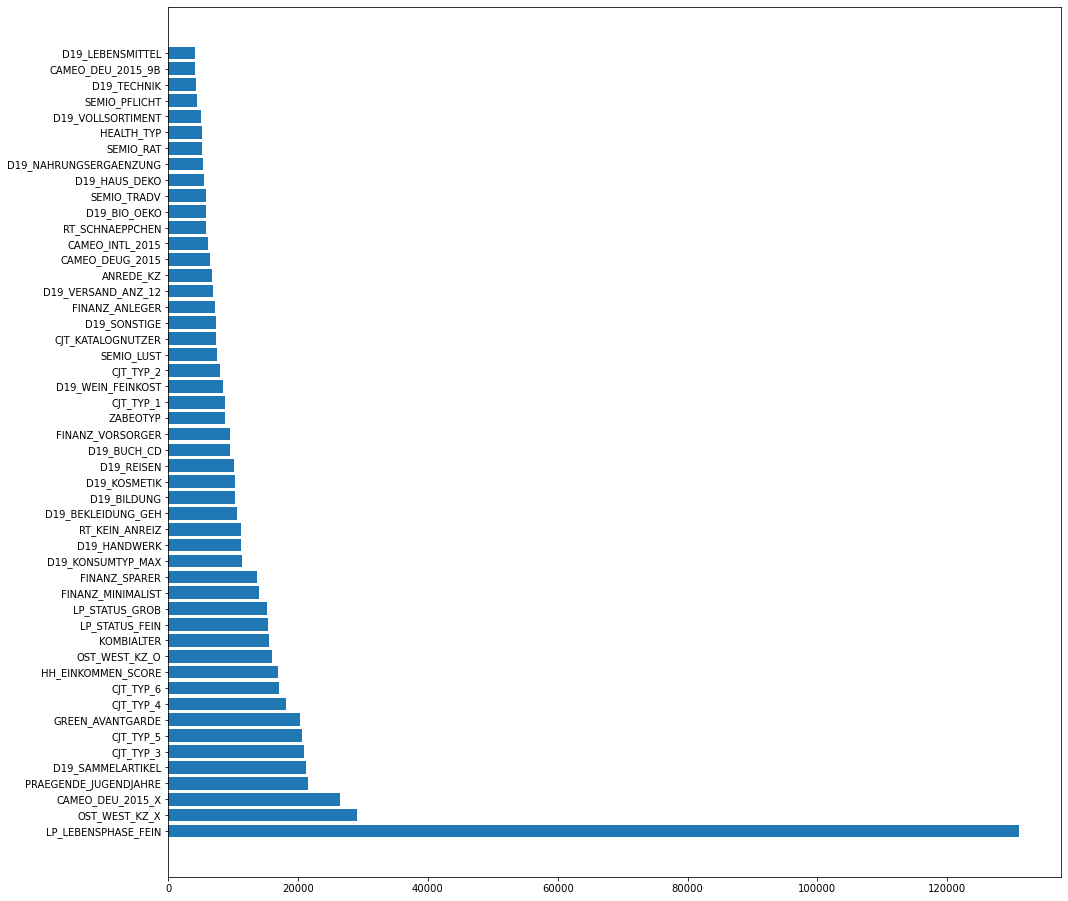

In [39]:
feature_scores = selector.scores_
topN = np.argsort(feature_scores*-1)[0:50]  # multiply by -1 to sort descending

plt.figure(figsize=(16,16))
plt.barh(np.array(selected_columns)[topN], feature_scores[topN])

In [40]:
"""
# One attribute far outweighs the others, investigate what it is
"""
level_info_df[level_info_df.Attribute == "LP_LEBENSPHASE_FEIN"]

,Unnamed: 0,Information level,Attribute,Description,Additional notes
15,NaN,NaN,LP_LEBENSPHASE_FEIN,lifestage fine,modelled on different AZ DIAS data


In [41]:
"""
There is no "right" answer for what is the best number of features to select. 
A good estimate of 50 can be gauged based on the barchart above 
"""
top50 =  np.argsort(feature_scores*-1)[0:50]  # -1 multiplication to sort descending order
feature_selected_columns = np.array(selected_columns)[top50]
print(f"Dropped {len(selected_columns)-len(feature_selected_columns)} columns, left with {len(feature_selected_columns)} features")

Dropped 147 columns, left with 50 features


##### Dimensionality Reduction
###### Principal Component Analysis(PCA)
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

##### BACKGROUND

The number of components onto which to project the data heavily influences the reconstruction error. High reconstruction error indicates information in the original data was lost. The benefit of having less components is it can lead to better generalization and training times.

The way to determine a good number of components is to look at the reconstruction error. The error is calculated as the normalized root mean square error between the original and data reconstructed from the projected data.

<AxesSubplot:xlabel='ncomponents'>

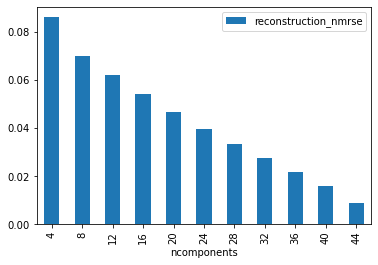

In [42]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


def normalized_rmse(x, z):
    """
    x is the true data
    z is the reconstructed/predicted data
    """    
    rmse = np.sqrt(mean_squared_error(x, z))
    nrmse = rmse/np.sqrt(np.mean(x**2))   # between [0, 1]
    return nrmse
    
    
components = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44]
pca_errors = []
for n_components in components:
    pca = PCA(n_components)
    pca_data = pca.fit_transform(combined_populations[feature_selected_columns])
    
    reconstructed = pca.inverse_transform(pca_data)
    nmrse = normalized_rmse(combined_populations[feature_selected_columns].values, reconstructed)
    pca_errors.append(nmrse)
    
reconstruction_errors = pd.DataFrame(list(zip(components, pca_errors)), columns=["ncomponents", "reconstruction_nmrse"])
reconstruction_errors.plot(x = "ncomponents", y = "reconstruction_nmrse", kind="bar")

In [43]:
"""
Based on the bar plot above, if a 0.02 reconstruction error is deemed acceptable, than it looks like we need 40 
components to achieve dimensionality reduction without introducing too much noise.

The threshold used to determine number of components to use is based on heuristics. There are only approximately right
answers here.
"""
pca = PCA(n_components=40)
dim_reduced_data = pca.fit_transform(combined_populations[feature_selected_columns])
print(dim_reduced_data.shape)

# put it back together into a df 
colnames = ["component{}".format(n) for n in range(1, dim_reduced_data.shape[1]+1)]
pca_combined_populations = pd.DataFrame(dim_reduced_data, columns=colnames)
pca_combined_populations.head()

(1082873, 40)


,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,...,component31,component32,component33,component34,component35,component36,component37,component38,component39,component40
0,7.821022,1.264764,0.232305,0.034983,0.271534,0.586198,0.033001,0.111581,-0.409937,-0.344922,...,-0.014293,-0.329777,-0.148031,0.028213,-0.305179,0.033122,-0.198226,-0.221190,0.040888,0.159014
1,-13.310794,0.443964,-1.648279,-0.476217,-0.019533,0.378917,0.124958,0.718065,0.196652,0.247062,...,0.015381,0.017418,0.111517,0.000566,-0.116736,0.020232,0.042794,-0.199002,-0.207758,-0.056165
2,-14.302644,0.367997,-1.366785,-0.572003,0.098932,0.238658,-0.361637,0.814703,0.082628,-0.008564,...,0.018392,-0.034645,0.296188,-0.022705,0.145438,0.027823,0.145127,-0.245075,-0.105294,-0.223336
3,-5.289115,-0.250417,-0.891656,0.041501,0.612064,-0.827265,-0.365703,0.010883,-0.028086,-0.059266,...,0.023000,-0.008404,-0.281971,0.017622,0.116582,0.016068,-0.025938,-0.153088,-0.272815,0.205157
4,-9.273710,-0.800630,0.916989,-0.312145,-0.637991,0.533340,-0.225093,-0.292990,-0.120737,-0.437935,...,-0.008829,0.071801,-0.139373,0.010173,0.029859,-0.012207,-0.014129,0.057047,-0.080928,0.199632


Text(0, 0.5, 'Explained Variance Ratio')

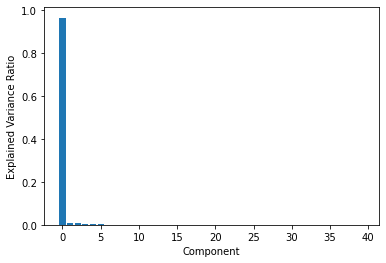

In [44]:
plt.bar(range(dim_reduced_data.shape[1]), pca.explained_variance_ratio_)
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")


#### As shown in the graph above and data below {explained variance ratio}, principal component 1 holds 96% of the information and most of the data is retained.

In [45]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.65775656e-01 7.60204718e-03 6.08554897e-03 3.06287318e-03
 2.11098358e-03 1.65621022e-03 1.39009542e-03 8.05304588e-04
 6.71402255e-04 6.37753263e-04 6.10827850e-04 5.74915752e-04
 5.64423077e-04 5.44859413e-04 5.21503301e-04 4.80497493e-04
 4.78381673e-04 4.47817649e-04 4.25118514e-04 4.01684864e-04
 3.95214687e-04 3.71690408e-04 3.57942963e-04 3.18956090e-04
 2.89650018e-04 2.83543467e-04 2.74670302e-04 2.45729817e-04
 2.37474590e-04 2.19949165e-04 1.99606031e-04 1.93414305e-04
 1.82582641e-04 1.68201966e-04 1.55974558e-04 1.44410486e-04
 1.40890878e-04 1.33648941e-04 1.31193338e-04 1.23417500e-04]


In [46]:
"""
It looks like just 1 component holds almost all of the explained variance. It dwarfs all of the other components.
https://ro-che.info/articles/2017-12-11-pca-explained-variance


Must revisit
"""

'\nIt looks like just 1 component holds almost all of the explained variance. It dwarfs all of the other components.\nhttps://ro-che.info/articles/2017-12-11-pca-explained-variance\n\n\nMust revisit\n'

###### Clustering again with filtered features

Elbow method is used to determine number of clusters. Yellobrick package used for visualization

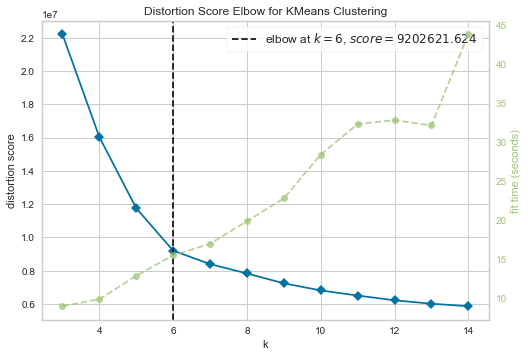

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3, 15))  # k = range(start, end)

visualizer.fit(pca_combined_populations)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [48]:
"""
Elbow at k=6 so we choose 6 clusters as optimal then evaluate the cluster metrics

We can use the clusters into which a lot of customers fall as the clusters that contain "customers OR potential 
customers"
"""



'\nElbow at k=6 so we choose 6 clusters as optimal then evaluate the cluster metrics\n\nWe can use the clusters into which a lot of customers fall as the clusters that contain "customers OR potential \ncustomers"\n'

In [49]:
nclusters = [6]
SSE = []
for K in nclusters:
    clusterer = KMeans(n_clusters=K, n_init=5, max_iter=200)
    clusterer.fit(pca_combined_populations)  # cluster on every feature except the label column
    
    SSE.append(clusterer.score)
    
pca_combined_populations["predicted_cluster"] = clusterer.labels_  # labels_ corresponds to the predicted cluster for each sample

In [50]:
pca_combined_populations.head(10)

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,...,component32,component33,component34,component35,component36,component37,component38,component39,component40,predicted_cluster
0,7.821022,1.264764,0.232305,0.034983,0.271534,0.586198,0.033001,0.111581,-0.409937,-0.344922,...,-0.329777,-0.148031,0.028213,-0.305179,0.033122,-0.198226,-0.221190,0.040888,0.159014,4
1,-13.310794,0.443964,-1.648279,-0.476217,-0.019533,0.378917,0.124958,0.718065,0.196652,0.247062,...,0.017418,0.111517,0.000566,-0.116736,0.020232,0.042794,-0.199002,-0.207758,-0.056165,5
2,-14.302644,0.367997,-1.366785,-0.572003,0.098932,0.238658,-0.361637,0.814703,0.082628,-0.008564,...,-0.034645,0.296188,-0.022705,0.145438,0.027823,0.145127,-0.245075,-0.105294,-0.223336,5
3,-5.289115,-0.250417,-0.891656,0.041501,0.612064,-0.827265,-0.365703,0.010883,-0.028086,-0.059266,...,-0.008404,-0.281971,0.017622,0.116582,0.016068,-0.025938,-0.153088,-0.272815,0.205157,1
4,-9.273710,-0.800630,0.916989,-0.312145,-0.637991,0.533340,-0.225093,-0.292990,-0.120737,-0.437935,...,0.071801,-0.139373,0.010173,0.029859,-0.012207,-0.014129,0.057047,-0.080928,0.199632,3
5,21.718047,-1.572425,-0.102016,0.286257,-0.151690,-0.545119,-0.411292,0.141960,-0.576919,0.185108,...,0.518356,-0.031989,-0.022732,0.185232,-0.040220,-0.019483,-0.094176,-0.087551,0.027397,0
6,-15.287449,-0.405096,0.271585,1.118557,0.456204,0.508572,-0.284635,0.346479,0.027708,-0.041211,...,0.205362,-0.332295,-0.005620,-0.102838,0.025125,0.123064,0.168032,0.092803,-0.061114,5
7,-14.300294,0.110928,-0.879173,-0.651649,-0.045961,-0.887656,-0.035126,-0.259934,0.033685,0.122131,...,0.018889,-0.051622,0.009129,0.136679,-0.013422,-0.068555,0.205520,-0.116774,0.171962,5
8,-15.314117,-0.540634,0.184914,1.803992,0.009547,0.456926,0.221014,0.039289,0.044089,0.002209,...,-0.028274,-0.088474,0.001191,-0.008523,0.000755,-0.035323,-0.047772,-0.004941,0.066112,5
9,5.664919,0.009562,-2.596220,-0.287391,-0.211306,0.377713,-0.065430,0.692783,-0.017966,0.218886,...,0.154258,-0.001185,0.007264,-0.144591,-0.006528,-0.288701,0.079256,0.036718,0.012455,4


In [51]:
pca_combined_populations.predicted_cluster.value_counts() / pca_combined_populations.shape[0]

5    0.243960
3    0.193076
1    0.171150
2    0.144108
0    0.139330
4    0.108375
Name: predicted_cluster, dtype: float64

In [52]:
combined_populations.head()

,LNR,AGER_TYP,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,...,D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST,D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN,D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT,D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST,D19_LETZTER_KAUF_BRANCHE_X,OST_WEST_KZ_O,OST_WEST_KZ_W,OST_WEST_KZ_X,label,predicted_cluster
0,630500,-1,0.375,0.232558,0.6,0.0,0.75,0.50,0.75,0.25,...,0,0,0,0,0,0,1.0,0,Unknown,6
1,308767,-1,0.875,0.906977,0.8,0.5,1.00,1.00,0.25,0.50,...,0,0,0,0,0,1,0.0,0,Unknown,3
2,198247,-1,0.375,0.279070,0.4,0.5,0.75,0.75,0.00,0.50,...,0,0,0,0,0,1,0.0,0,Unknown,9
3,420036,-1,1.000,0.906977,0.4,0.5,1.00,1.00,0.25,0.50,...,0,0,0,0,1,0,1.0,0,Unknown,3
4,968756,-1,0.500,0.441860,0.2,1.0,0.25,0.25,1.00,1.00,...,0,0,0,0,0,0,1.0,0,Unknown,14


In [53]:
from collections import Counter

pca_combined_populations["label"] = combined_populations.label.copy()
# pca_combined_populations.groupby("predicted_cluster")["label"].apply(Counter)
customers_only = pca_combined_populations[pca_combined_populations.label=="customer"]

customers_only["predicted_cluster"].value_counts() / customers_only.shape[0]

"""
1    0.260096
0    0.257310
3    0.138475
2    0.137812
4    0.105801
5    0.100505

Clusters 0 and 1 hold more than 50% of the customers. 
People from the general population that fall into clusters 0 and 1 are more likely to transition to becoming customers.
WIthin the customers, clusters 0 and 1 contain almost equal sample counts, meaning the customers fall into two segments.
"""

'\n1    0.260096\n0    0.257310\n3    0.138475\n2    0.137812\n4    0.105801\n5    0.100505\n\nClusters 0 and 1 hold more than 50% of the customers. \nPeople from the general population that fall into clusters 0 and 1 are more likely to transition to becoming customers.\nWIthin the customers, clusters 0 and 1 contain almost equal sample counts, meaning the customers fall into two segments.\n'

# Supervised Learning

#### Benchmark Supervised Learning  

In [54]:
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate

# exclude the features we know are just related to ID and hold no meaning
excluded_columns = ["LNR", "AGER_TYP"]
selected_columns = []
for column in feature_columns:
    if column not in excluded_columns:  # determine which columns not to use
        selected_columns.append(column)
        
label_column = ["RESPONSE"]

normalized_traindata = normalized_traindata.sample(frac=1.0)
X = normalized_traindata[selected_columns]
Y = normalized_traindata[label_column]

In [55]:
# exclude the features we know are just related to ID and hold no meaning
excluded_columns = ["LNR", "AGER_TYP"]
selected_columns = []
for column in feature_columns:
    if column not in excluded_columns:  # determine which columns not to use
        selected_columns.append(column)
        

#normalized_testdata = normalized_testdata.sample(frac=1.0)
X_test = normalized_testdata[selected_columns]



In [56]:
# no hyperparameter tuning for benchmark model

logistic = LogisticRegression(class_weight="balanced")
dtree = DecisionTreeClassifier(class_weight="balanced")
randomforest = RandomForestClassifier(class_weight="balanced")
knn = KNeighborsClassifier()

classifiers = [logistic, dtree, randomforest, knn] #removed svc from the list
scoring_metrics = ["accuracy", "f1", "precision", "recall", "roc_auc"]

cv_results = {}

for clf in classifiers:
    clfname = clf.__class__.__name__
    print("Training {}".format(clfname))   # __class__ gets the class object and then the __name__ property is present for any class and returns the name of the class
    results = cross_validate(clf, X, Y, cv=5, n_jobs=-1, scoring=scoring_metrics, verbose=1, return_train_score=True)
    cv_results[clfname] = results

Training LogisticRegression


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.8s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.0s finished


Training DecisionTreeClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


Training RandomForestClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.3s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.5s finished


Training KNeighborsClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished


In [57]:
cv_results_df = pd.DataFrame(cv_results)
display (cv_results_df)
display (cv_results_df['LogisticRegression'])

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier
fit_time,"[2.5384037494659424, 2.665431499481201, 2.4863...","[1.6653845310211182, 1.4793050289154053, 1.485...","[8.83874773979187, 8.986008882522583, 9.151895...","[3.6248579025268555, 3.616854429244995, 3.5718..."
score_time,"[0.05301475524902344, 0.04602861404418945, 0.0...","[0.03399920463562012, 0.0380096435546875, 0.03...","[0.5084819793701172, 0.508542537689209, 0.5085...","[47.52785539627075, 47.61888098716736, 47.0257..."
test_accuracy,"[0.6583265448620971, 0.6613522634702665, 0.667...","[0.9521703712323984, 0.9364599092284418, 0.929...","[0.9659024787617828, 0.9653206097986733, 0.943...","[0.9875480041894565, 0.9875480041894565, 0.987..."
train_accuracy,"[0.6599260961913352, 0.6689749483546219, 0.661...","[0.9762576740667462, 0.9589164654194187, 0.960...","[0.9762576740667462, 0.9764613459803893, 0.960...","[0.987634205243097, 0.9875760132677703, 0.9876..."
test_f1,"[0.03611293499671701, 0.034505640345056404, 0....","[0.019093078758949878, 0.03191489361702128, 0....","[0.02006688963210702, 0.032467532467532464, 0....","[0.0, 0.0, 0.0, 0.0, 0.0]"
train_f1,"[0.04603330068560235, 0.04787011465394594, 0.0...","[0.48999999999999994, 0.36224028906955735, 0.3...","[0.48999999999999994, 0.49278996865203756, 0.3...","[0.00468384074941452, 0.0, 0.00932400932400932..."
test_precision,"[0.0187138482477033, 0.017887856897144824, 0.0...","[0.01282051282051282, 0.019693654266958426, 0....","[0.015625, 0.024875621890547265, 0.00777202072...","[0.0, 0.0, 0.0, 0.0, 0.0]"
train_precision,"[0.023843747357740763, 0.024817771607080874, 0...","[0.33361702127659576, 0.22414756847400782, 0.2...","[0.33361702127659576, 0.33589743589743587, 0.2...","[0.5, 0.0, 0.6666666666666666, 0.0, 0.0]"
test_recall,"[0.514018691588785, 0.48598130841121495, 0.584...","[0.037383177570093455, 0.08411214953271028, 0....","[0.028037383177570093, 0.04672897196261682, 0....","[0.0, 0.0, 0.0, 0.0, 0.0]"
train_recall,"[0.6635294117647059, 0.6729411764705883, 0.643...","[0.9223529411764706, 0.9435294117647058, 0.941...","[0.9223529411764706, 0.9247058823529412, 0.936...","[0.002352941176470588, 0.0, 0.0046948356807511..."


fit_time           [2.5384037494659424, 2.665431499481201, 2.4863...
score_time         [0.05301475524902344, 0.04602861404418945, 0.0...
test_accuracy      [0.6583265448620971, 0.6613522634702665, 0.667...
train_accuracy     [0.6599260961913352, 0.6689749483546219, 0.661...
test_f1            [0.03611293499671701, 0.034505640345056404, 0....
train_f1           [0.04603330068560235, 0.04787011465394594, 0.0...
test_precision     [0.0187138482477033, 0.017887856897144824, 0.0...
train_precision    [0.023843747357740763, 0.024817771607080874, 0...
test_recall        [0.514018691588785, 0.48598130841121495, 0.584...
train_recall       [0.6635294117647059, 0.6729411764705883, 0.643...
test_roc_auc       [0.6312508122228806, 0.6342232726359635, 0.673...
train_roc_auc      [0.7254750038125077, 0.7299117924332118, 0.715...
Name: LogisticRegression, dtype: object

In [58]:
mean_results = []
for col in cv_results_df.columns:
    mean_results.append(cv_results_df[col].apply(np.mean))
cv_results_df = pd.concat(mean_results, axis=1)

<AxesSubplot:>

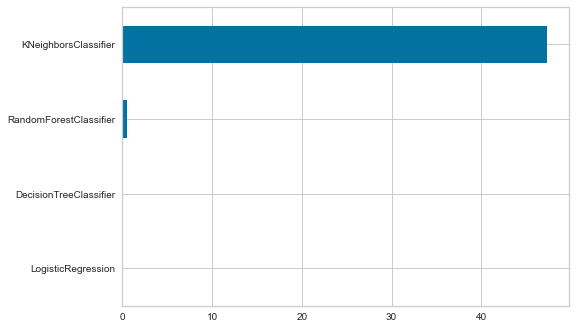

In [59]:
cv_results_df.loc["score_time"].plot(kind="barh")

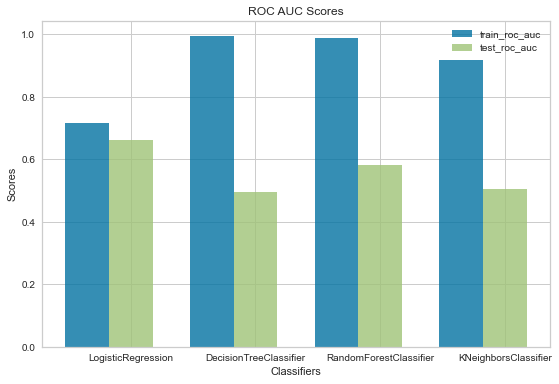

In [60]:
def plot_scores(x, y1, y2, label1, label2, title, xlabel="Classifiers", ylabel="Scores"):
    n_groups = len(x)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, y1, bar_width,
    alpha=opacity,
    color='b',
    label=label1)

    rects2 = plt.bar(index + bar_width, y2, bar_width,
    alpha=opacity,
    color='g',
    label=label2)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(index + bar_width, ('LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier'))
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_scores(cv_results_df.columns, 
            cv_results_df.loc["train_roc_auc"], 
            cv_results_df.loc["test_roc_auc"],
            "train_roc_auc",
            "test_roc_auc",
            "ROC AUC Scores")
            

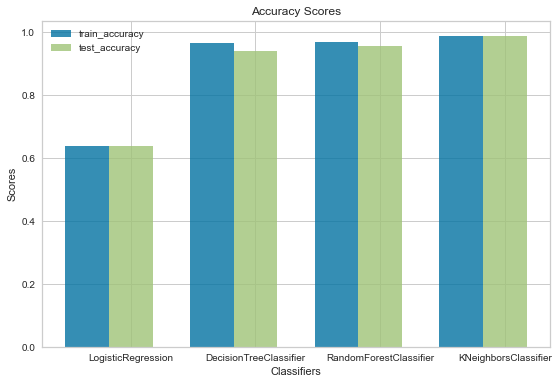

In [61]:
plot_scores(cv_results_df.columns, 
           cv_results_df.loc["train_accuracy"],
           cv_results_df.loc["test_accuracy"],
           "train_accuracy",
           "test_accuracy",
           "Accuracy Scores")

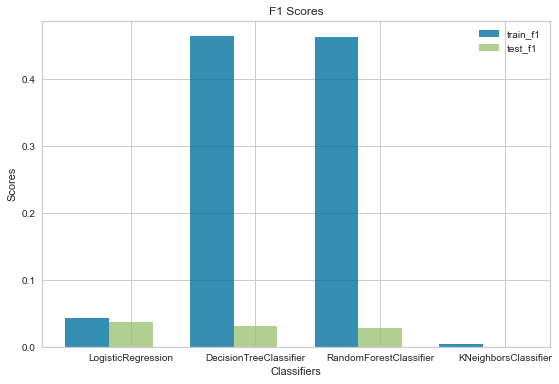

In [62]:
plot_scores(cv_results_df.columns,
           cv_results_df.loc["train_f1"],
           cv_results_df.loc["test_f1"],
           "train_f1",
           "test_f1",
           "F1 Scores")

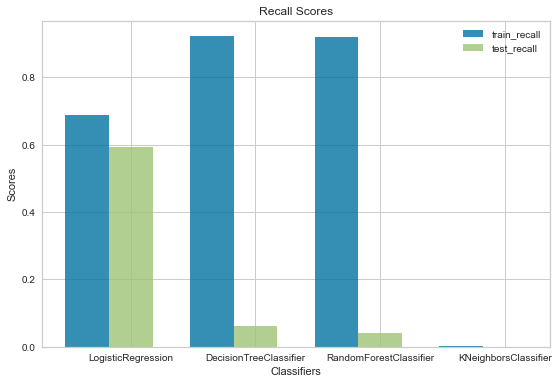

In [63]:
plot_scores(cv_results_df.columns,
           cv_results_df.loc["train_recall"],
           cv_results_df.loc["test_recall"],
           "train_recall",
           "test_recall",
           "Recall Scores")

#### Observation: 
with the exception of accuracy score, logistic regression has the highest score in each of the given metrics.Accuracy is high for the other three models.


## Hyperparameter Tuning
#### Before Feature Selection and Feature Scaling

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate

# exclude the features we know are just related to ID and hold no meaning
excluded_columns = ["LNR", "AGER_TYP"]
selected_columns = []
for column in feature_columns:
    if column not in excluded_columns:  # determine which columns not to use
        selected_columns.append(column)
        
label_column = ["RESPONSE"]

normalized_traindata = normalized_traindata.sample(frac=1.0)
X = normalized_traindata[selected_columns]
Y = normalized_traindata[label_column]

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {'C':[0.5, 1, 10, 100], 'class_weight':['balanced'], }
logreg=LogisticRegression()
clf = GridSearchCV(logreg, parameters,
                   n_jobs=-1, 
                   return_train_score=True, 
                   verbose=1, 
                   scoring=scoring_metrics,
                   refit='roc_auc',  # use recall to evaluate best estimator? 
                  )
clf.fit(X, Y)

clf.best_estimator_


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   11.8s finished
c:\users\jaweria\miniconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\jaweria\miniconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight='balanced')

In [55]:
best=clf.best_estimator_

In [56]:
best.fit(X, Y)
pred_log=best.predict_proba(X_test)

c:\users\jaweria\miniconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\jaweria\miniconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#pd.DataFrame({"LNR":normalized_testdata.LNR, "RESPONSE":pred_log[:, 1]}).to_csv("logistic submission1.csv", index=False, header=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(class_weight="balanced", random_state=42)
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 8, 12],
    'criterion' :['gini', 'entropy']
    }
CV_rfc = GridSearchCV(estimator=rfc, 
                      param_grid=param_grid, 
                      cv= 5,
                      n_jobs=-1,
                      verbose=1,
                      scoring=scoring_metrics, 
                      refit="roc_auc")
CV_rfc.fit(X, Y.values.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min


In [ ]:
CV_rfc.best_estimator_

In [ ]:
#rfc1=RandomForestClassifier(class_weight='balanced', random_state=42, max_features='auto', n_estimators= 200, max_depth=4, criterion='entropy')

In [ ]:
Y_rav = Y.values.ravel()

In [ ]:
rfc1.fit(X, Y_rav)
pred=rfc1.predict_proba(X_test)

In [ ]:
#pd.DataFrame({"LNR":normalized_testdata.LNR.values.squeeze(), "RESPONSE":pred[:, 1]}).to_csv("rfc submission.csv", index=False, header=True)